### Load Necessary Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

### Load Approved Building Permits Dataset
Because the dataset is too large to upload to GitHub, we can use the following two methods to load the dataset. 

**Method 1**: Download the dataset here https://data.boston.gov/dataset/approved-building-permits, replace the example file name in the read_csv code below with your file name, and run the remaining section to preprocess data

In [37]:
df = pd.read_csv("../data/approved_building_permits.csv", low_memory=False)

In [38]:
df

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,y_latitude,x_longitude
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,...,181-183 State ST,Boston,MA,02109,"130,392.00","303,807,000.00","2,956,234.65","777,000.47",42.36,-71.05
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,...,175 W Boundary RD,West Roxbury,MA,02132,"17,268.00","2,012,032,000.00","2,920,239.25","751,016.12",42.26,-71.15
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,...,15 Prospect ST,Charlestown,MA,02129,"113,443.00","202,837,000.00","2,962,078.12","775,710.38",42.38,-71.06
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,...,211 W Springfield ST,Roxbury,MA,02118,"129,994.00","402,558,000.00","2,949,422.57","769,648.31",42.34,-71.08
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,...,14 William Jackson AVE,Brighton,MA,02135,"149,852.00","2,204,944,000.00","2,950,790.70","749,690.30",42.34,-71.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656681,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,$0.00,$50.00,2019-09-25 15:36:11+00,2020-03-25 04:00:00+00,...,3 Center PZ,Boston,MA,02108,"154,961.00","302,717,000.00","2,956,658.34","774,864.86",42.36,-71.06
656682,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,"$1,000.00",$53.00,2019-09-12 17:07:00+00,2020-03-12 04:00:00+00,...,1188 Commonwealth AV,Allston,MA,02134,"424,193.00","2,101,574,010.00","2,952,823.42","756,414.44",42.35,-71.13
656683,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,"$2,700.00",$53.00,2012-05-30 18:28:59+00,2012-11-30 05:00:00+00,...,46 Burroughs ST,Jamaica Plain,MA,02130,"24,047.00","1,901,861,000.00","2,939,397.90","759,722.47",42.31,-71.12
656684,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$53.00,2023-04-10 15:10:24+00,2023-10-10 04:00:00+00,...,16 Colonial AVE,Dorchester,MA,02124,"34,863.00","1,701,519,000.00","2,931,226.65","771,088.02",42.29,-71.08


In [39]:
worktype_mapping = {
    'INTEXT': 'Renovation & Interior/Exterior Work',
    'INTREN': 'Renovation & Interior/Exterior Work',
    'EXTREN': 'Renovation & Interior/Exterior Work',
    'OTHER': 'Miscellaneous',
    'SPRINK': 'Fire Protection & Safety',
    'ADDITION': 'Renovation & Interior/Exterior Work',
    'COB': 'Miscellaneous',
    'FA': 'Fire Protection & Safety',
    'ERECT': 'Construction & New Installations',
    'SITE': 'Temporary Structures & Events',
    'VIOL': 'Miscellaneous',
    'PLUMBING': 'Electrical, Plumbing & Utility Systems',
    'SPCEVE': 'Temporary Structures & Events',
    'NEWCON': 'Construction & New Installations',
    'SIGNES': 'Signage & Canopy',
    'SPRNK9': 'Fire Protection & Safety',
    'EXTDEM': 'Demolition',
    'SD': 'Miscellaneous',
    'ROOF': 'Renovation & Interior/Exterior Work',
    'GARAGE': 'Construction & New Installations',
    'AWNING': 'Signage & Canopy',
    'FENCE2': 'Renovation & Interior/Exterior Work',
    'INSUL': 'Renovation & Interior/Exterior Work',
    'SIGNS': 'Signage & Canopy',
    'FSTTRK': 'Temporary Structures & Events',
    'CHGOCC': 'Occupancy & Use Change',
    'CELL': 'Temporary Structures & Events',
    'NROCC': 'Miscellaneous',
    'SOL': 'Construction & New Installations',
    'INTDEM': 'Demolition',
    'SPFT': 'Miscellaneous',
    'RAZE': 'Demolition',
    'TMPSER': 'Temporary Structures & Events',
    'ELECTRICAL': 'Electrical, Plumbing & Utility Systems',
    'GEN': 'Electrical, Plumbing & Utility Systems',
    'CANP': 'Signage & Canopy',
    'FENCE': 'Renovation & Interior/Exterior Work',
    'SIDE': 'Renovation & Interior/Exterior Work',
    'HOLVEN': 'Miscellaneous',
    'CONVRT': 'Miscellaneous',
    'SRVCHG': 'Electrical, Plumbing & Utility Systems',
    'LVOLT': 'Electrical, Plumbing & Utility Systems',
    'MAINT': 'Miscellaneous',
    'Service': 'Miscellaneous',
    'DRIVE': 'Construction & New Installations',
    'INDBLR': 'Electrical, Plumbing & Utility Systems',
    'TEMTRL': 'Temporary Structures & Events',
    'FLAM': 'Fire Protection & Safety',
    'COMPAR': 'Miscellaneous',
    'TVTRK': 'Temporary Structures & Events',
    'New': 'Construction & New Installations',
    'GAS': 'Electrical, Plumbing & Utility Systems',
    'INDFUR': 'Electrical, Plumbing & Utility Systems',
    'AWNRNW': 'Signage & Canopy',
    'RNWSIG': 'Signage & Canopy',
    'RESPAR': 'Miscellaneous',
    'AWNRET': 'Signage & Canopy',
    'BFCHMINFIN': 'Miscellaneous',
    'BFCHMTENT': 'Temporary Structures & Events',
    'General': 'Miscellaneous',
    'Dumpsters': 'Miscellaneous',
    'TMPUSOC': 'Occupancy & Use Change',
    'OSEAT': 'Temporary Structures & Events',
    'CANPRN': 'Signage & Canopy',
    'TCOO': 'Temporary Structures & Events'
}

df = df.dropna()

df.loc[:, 'issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce', format='mixed').dt.date
df.loc[:, 'expiration_date'] = pd.to_datetime(df['expiration_date'], errors='coerce', format='mixed').dt.date

d7_zip = ["02119", "02120", "02121", "02122", "02124", "02125", "02115", "02215", "02118"]
df = df[df['zip'].isin(d7_zip)].copy()
df.loc[:, 'zip'] = df['zip'].apply(lambda x: str(x).zfill(5))

d7_city = ["Dorchester", "Fenway", "Roxbury", "South End"]
df = df[df['city'].isin(d7_city)].copy()

columns_to_drop = ['property_id', 'parcel_id', 'gpsy', 'gpsx']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

df['new_worktype'] = df['worktype'].map(worktype_mapping)

df = df.dropna(subset=['new_worktype'])

df

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,status,occupancytype,sq_feet,address,city,state,zip,y_latitude,x_longitude,new_worktype
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13,2020-05-13,Closed,Multi,0.00,211 W Springfield ST,Roxbury,MA,02118,42.34,-71.08,Renovation & Interior/Exterior Work
8,A1002830,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amend to remove the language of remodel Game R...,Albert Li,$0.00,$26.00,2019-10-02,2020-04-02,Open,1-3FAM,0.00,52 Guild ST,Roxbury,MA,02119,42.33,-71.09,Renovation & Interior/Exterior Work
10,A1003458,EXTREN,Amendment to a Long Form,Renovations - Exterior,Add two rear balconies and roof deck. Please r...,Thomas Helms,$1.00,$30.00,2021-02-16,2021-08-16,Open,1-2FAM,0.00,170 W Brookline ST,Roxbury,MA,02118,42.34,-71.08,Renovation & Interior/Exterior Work
14,A1005787,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to ERT759370. Finishing the basement...,MAYA ALGERE,"$22,000.00",$240.00,2020-01-28,2020-07-28,Open,1-2FAM,0.00,40 Senator Bolling CIR,Dorchester,MA,02124,42.29,-71.09,Renovation & Interior/Exterior Work
15,A1005844,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to ERT841761.(2170 sq ft Single fami...,MAYA ALGERE,"$23,500.00",$260.00,2020-10-27,2021-04-27,Closed,1-2FAM,0.00,43 Senator Bolling CI,Dorchester,MA,02124,42.29,-71.09,Renovation & Interior/Exterior Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656666,U49971302,OSEAT,Use of Premises,Outside Seating,Establish seasonal outdoor seating on private ...,Brendan Boyle,$0.00,$56.00,2019-08-29,2020-02-29,Open,Mixed,0.00,345 Harrison Av,Roxbury,MA,02118,42.34,-71.06,Temporary Structures & Events
656671,U49979071,OTHER,Use of Premises,Other,3 car parking (PAPER PLAN),SEAN DESIREE,"$5,000.00",$56.00,2020-06-11,2020-12-11,Open,1-2FAM,0.00,8 Westcott ST,Dorchester,MA,02124,42.29,-71.08,Miscellaneous
656675,U49988192,RESPAR,Use of Premises,Residential Parking,installation of a 400 square foot brick paving...,Giovanni Tejeda,"$13,000.00",$56.00,2020-09-29,2021-03-29,Closed,1-2FAM,0.00,5 Nottingham ST,Dorchester,MA,02121,42.30,-71.07,Miscellaneous
656684,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$53.00,2023-04-10,2023-10-10,Open,1-3FAM,0.00,16 Colonial AVE,Dorchester,MA,02124,42.29,-71.08,Miscellaneous


**Method 2**: Run the ZipFile code below to load the cleaned dataset that is uploaded to GitHub as a zip file 

In [40]:
with zipfile.ZipFile("/Users/ann/Downloads/d7-approved-building-permits.csv.zip") as z:
    print(z.namelist())
    with z.open('d7-approved-building-permits.csv') as f:
        df = pd.read_csv(f, low_memory=False)
df

['d7-approved-building-permits.csv', '__MACOSX/._d7-approved-building-permits.csv']


,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,y_latitude,x_longitude,new_worktype,issued_year
0,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"74,295.75",803.00,2019-11-13,2020-05-13,...,Multi,0.00,211 W Springfield ST,Roxbury,MA,2118,42.34,-71.08,Renovation & Interior/Exterior Work,2019
1,A1002830,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amend to remove the language of remodel Game R...,Albert Li,0.00,26.00,2019-10-02,2020-04-02,...,1-3FAM,0.00,52 Guild ST,Roxbury,MA,2119,42.33,-71.09,Renovation & Interior/Exterior Work,2019
2,A1003458,EXTREN,Amendment to a Long Form,Renovations - Exterior,Add two rear balconies and roof deck. Please r...,Thomas Helms,1.00,30.00,2021-02-16,2021-08-16,...,1-2FAM,0.00,170 W Brookline ST,Roxbury,MA,2118,42.34,-71.08,Renovation & Interior/Exterior Work,2021
3,A1005787,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to ERT759370. Finishing the basement...,MAYA ALGERE,"22,000.00",240.00,2020-01-28,2020-07-28,...,1-2FAM,0.00,40 Senator Bolling CIR,Dorchester,MA,2124,42.29,-71.09,Renovation & Interior/Exterior Work,2020
4,A1005844,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to ERT841761.(2170 sq ft Single fami...,MAYA ALGERE,"23,500.00",260.00,2020-10-27,2021-04-27,...,1-2FAM,0.00,43 Senator Bolling CI,Dorchester,MA,2124,42.29,-71.09,Renovation & Interior/Exterior Work,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134459,U49971302,OSEAT,Use of Premises,Outside Seating,Establish seasonal outdoor seating on private ...,Brendan Boyle,0.00,56.00,2019-08-29,2020-02-29,...,Mixed,0.00,345 Harrison Av,Roxbury,MA,2118,42.34,-71.06,Temporary Structures & Events,2019
134460,U49979071,OTHER,Use of Premises,Other,3 car parking (PAPER PLAN),SEAN DESIREE,"5,000.00",56.00,2020-06-11,2020-12-11,...,1-2FAM,0.00,8 Westcott ST,Dorchester,MA,2124,42.29,-71.08,Miscellaneous,2020
134461,U49988192,RESPAR,Use of Premises,Residential Parking,installation of a 400 square foot brick paving...,Giovanni Tejeda,"13,000.00",56.00,2020-09-29,2021-03-29,...,1-2FAM,0.00,5 Nottingham ST,Dorchester,MA,2121,42.30,-71.07,Miscellaneous,2020
134462,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"7,000.00",53.00,2023-04-10,2023-10-10,...,1-3FAM,0.00,16 Colonial AVE,Dorchester,MA,2124,42.29,-71.08,Miscellaneous,2023


### Data Visualization

<Figure size 2000x1000 with 0 Axes>

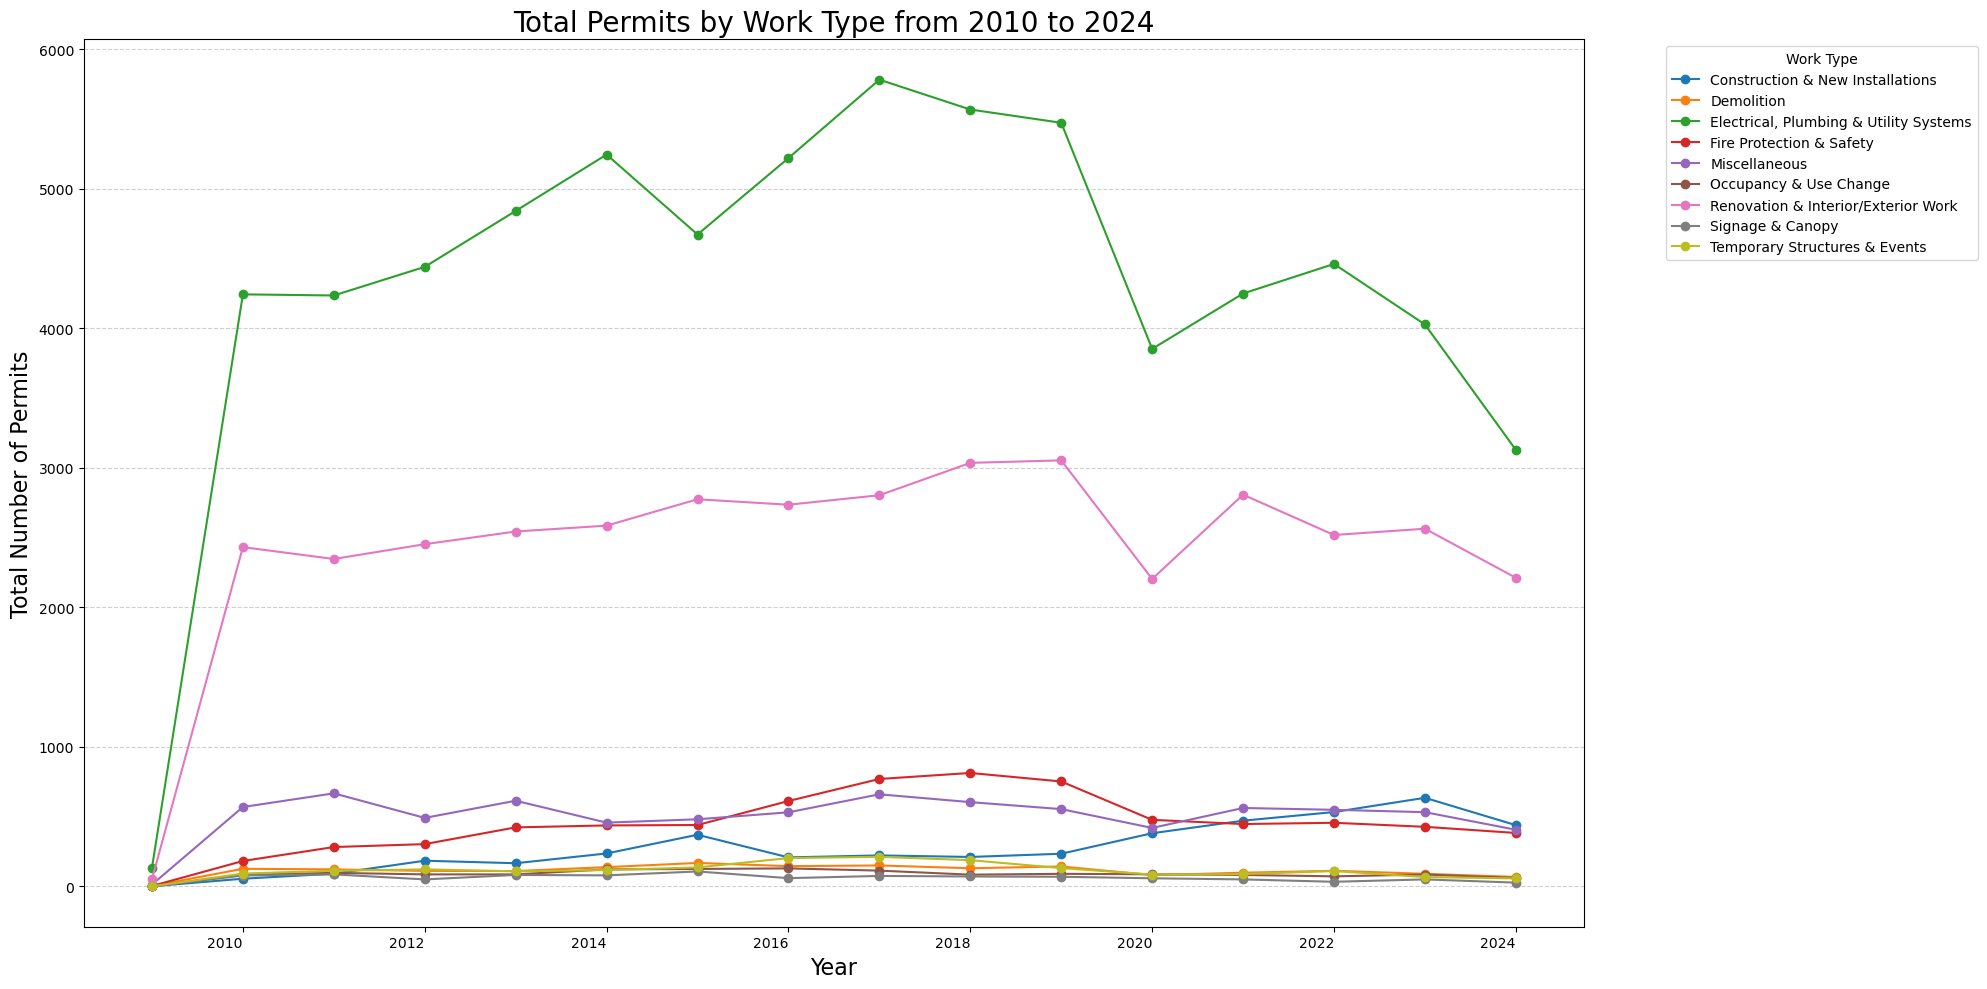

In [41]:
df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce')
df = df.dropna(subset=['issued_date'])

df['issued_year'] = df['issued_date'].dt.year

worktype_counts_per_year = df.groupby(['issued_year', 'new_worktype']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
worktype_counts_per_year.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permits by Work Type from 2010 to 2024', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Number of Permits', fontsize=16)
plt.xticks(rotation=0, ha='right')
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

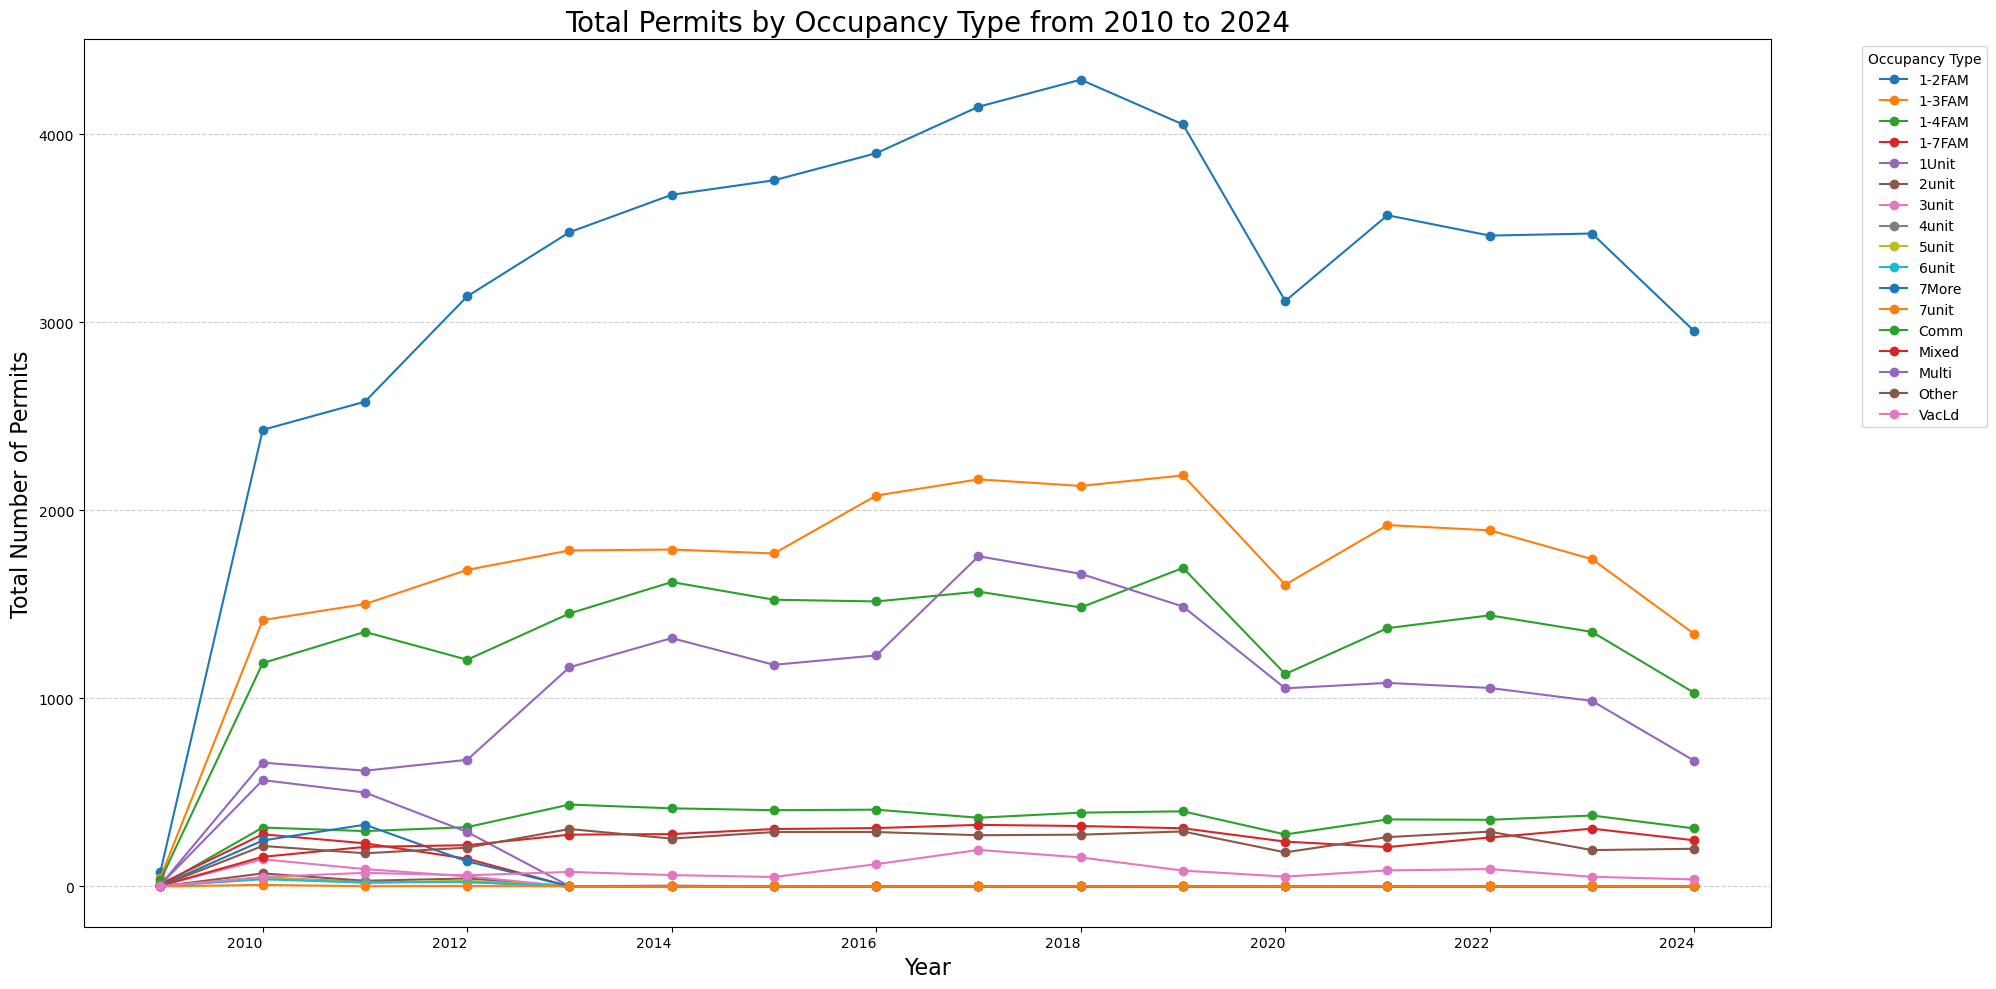

In [42]:
df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce')
df = df.dropna(subset=['issued_date'])

df['issued_year'] = df['issued_date'].dt.year

occupancytype_counts_per_year = df.groupby(['issued_year', 'occupancytype']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
occupancytype_counts_per_year.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permits by Occupancy Type from 2010 to 2024', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Number of Permits', fontsize=16)
plt.xticks(rotation=0, ha='right')
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

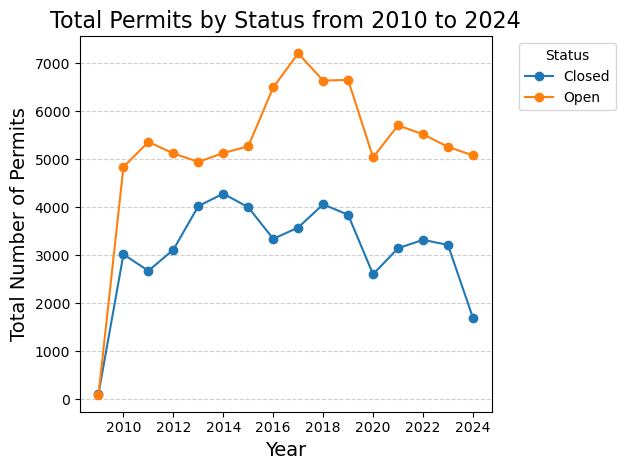

In [43]:
status_counts_per_year = df.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
status_counts_per_year.plot(kind='line', marker='o', linestyle='-')

plt.title('Total Permits by Status from 2010 to 2024', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Permits', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Summary Statistics

In [44]:
df['total_fees'] = pd.to_numeric(df['total_fees'].replace(r'[\$,]', '', regex=True))
df['declared_valuation'] = pd.to_numeric(df['declared_valuation'].replace(r'[\$,]', '', regex=True))

summary_stats = df[['total_fees', 'declared_valuation']].describe()

pd.options.display.float_format = '{:,.2f}'.format

print(summary_stats)

        total_fees  declared_valuation
count   134,464.00          134,464.00
mean        561.80           77,702.08
std      12,792.84        2,511,516.26
min           0.00       -1,000,000.00
25%          30.00            1,200.00
50%          65.00            5,000.00
75%         160.00           16,000.00
max   2,103,990.00      694,040,401.00


### Export to CSV

In [45]:
df.to_csv("/Users/ann/Desktop/d7-approved-building-permits.csv", index=False)